In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import neighbors
from matplotlib.colors import ListedColormap

In [25]:
def knn_plot(data, n_neighbors=10):
    X= data[:, :2]
    y= data[:,2]
    
    h= 0.02
    x0_min, x0_max= X[:,0].min()-1, X[:,0].max()+1
    x1_min, x1_max= X[:,1].min()-1, X[:,1].max()+1
    
    xx, yy =np.meshgrid(np.arange(x0_min,x0_max,h ),np.arange(x1_min, x1_max, h)) 
    
    cmap_light = ListedColormap(['#FFAAAB',  '#BAAAFF']) #colours ranging for the values [0,1]
    cmap_bold = ListedColormap(['#FF000B',  '#B000FF']) 
    
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    
    # pcolormesh will plot the (xx,yy) grid with colors according to the values of Z
    # it looks like decision boundry
    plt.figure()
    plt.pcolormesh(xx, yy, Z, shading='auto', cmap=cmap_light)
   
    # scatter plot of given points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
   
    plt.title('K value = '+str(n_neighbors))
    
    plt.show()
    
    

xx and yy are grids as shown below:
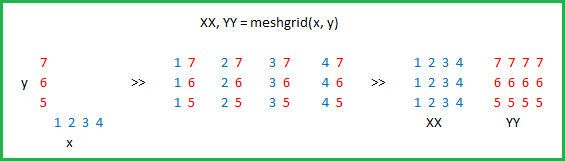

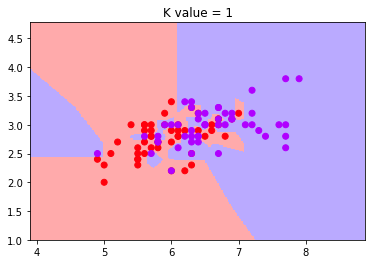

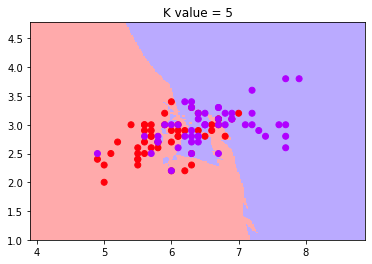

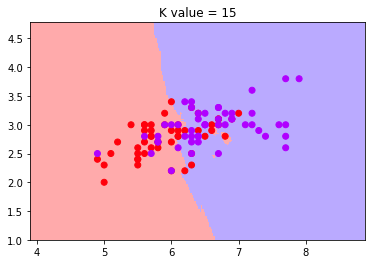

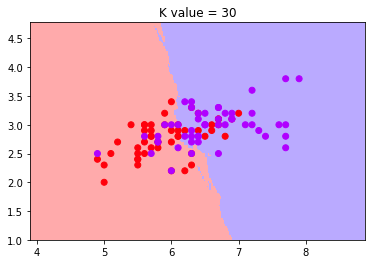

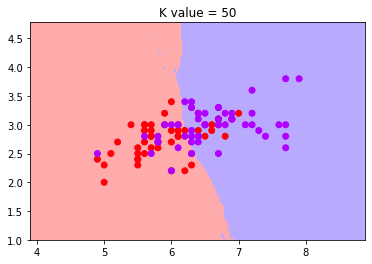

In [26]:
data = np.genfromtxt('../Data/demo_data/6.overlap.csv', delimiter=',')
knn_plot(data, 1)
knn_plot(data, 5)
knn_plot(data,15)
knn_plot(data, 30)
knn_plot(data, 50)